# Pre-trained Model: VGG16

**VGG16: A Deep Convolutional Neural Network for Image Classification**

**Key Features:**

**16 Layers:** It has 13 convolutional layers and 3 fully connected layers, hence the name "VGG16."

**Small Filters:** It uses small 3x3 filters, stacked in succession for effective feature extraction.

**Simple Architecture:** It maintains a consistent structure, making it easy to understand and implement.

**ImageNet Training:** It's pre-trained on the massive ImageNet dataset, containing over 14 million images and 1000 classes.
Architecture:

**Architecture:**

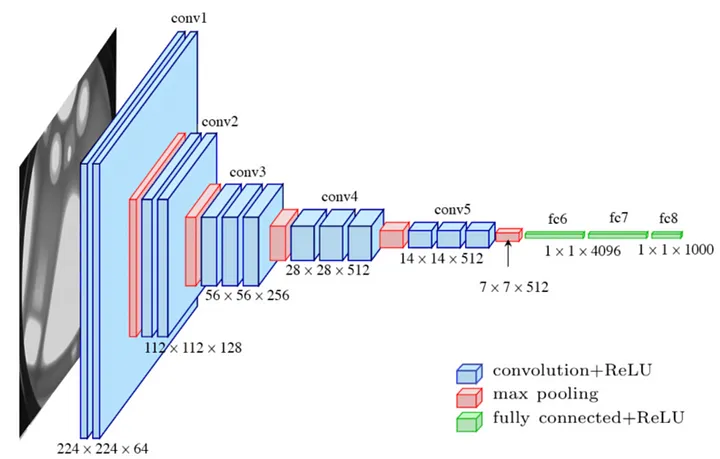

**Initial Use:**

**Image Classification:** Its primary use was to classify images into 1000 different categories with high accuracy (92.7% on ImageNet).
Feature Extraction: It's often used to extract meaningful features from images, which can then be used for other tasks like object detection, style transfer, and image generation.

# Transfer Learning

## Import Libraries

In [1]:
import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

## Loading the dataset

In [2]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

170498071/170498071 [==============================] - 3s 0us/step


## Preprocessing the dataset

In [3]:
# Normalizing
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

# (one-hot encoding)
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [5]:
# VGG16 base model


# Freezing initial layers




# Data augmentation





Epoch 1/30
  80/1562 [>.............................] - ETA: 38:23 - loss: 2.0577 - accuracy: 0.2492

KeyboardInterrupt: 

## Loading Pre-trained VGG-16 model

In [ ]:
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(32, 32, 3))
base_model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 32, 32, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 32, 32, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 16, 16, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 16, 16, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 16, 16, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 8, 8, 128)         0     

## Freezing the base layers

In [ ]:
for layer in base_model.layers[:15]:
    layer.trainable = False

## Add New Classifier Layers

In [ ]:
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.5)(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(10, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=predictions)

## New Model

In [ ]:
optimizer = Adam(learning_rate=0.0001)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 32, 32, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 32, 32, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 16, 16, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 16, 16, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 16, 16, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 8, 8, 128)         0   

## Data Augmentation

In [ ]:
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

## Fine-tuning the model

In [ ]:
batch_size = 32

history = model.fit(datagen.flow(X_train, y_train, batch_size=batch_size),
                  epochs=30,
                  steps_per_epoch=X_train.shape[0] // batch_size,
                  validation_data=(X_test, y_test))

Epoch 1/30
1563/1563 [==============================] - 18s 11ms/step - loss: 1.3148 - accuracy: 0.5385 - val_loss: 1.2361 - val_accuracy: 0.5630
Epoch 2/30
1563/1563 [==============================] - 16s 10ms/step - loss: 1.1426 - accuracy: 0.5979 - val_loss: 1.1570 - val_accuracy: 0.5891
Epoch 3/30
1563/1563 [==============================] - 16s 10ms/step - loss: 1.0637 - accuracy: 0.6258 - val_loss: 1.1523 - val_accuracy: 0.5979
Epoch 4/30
1563/1563 [==============================] - 16s 10ms/step - loss: 1.0045 - accuracy: 0.6438 - val_loss: 1.1164 - val_accuracy: 0.6155
Epoch 5/30
1563/1563 [==============================] - 16s 10ms/step - loss: 0.9488 - accuracy: 0.6637 - val_loss: 1.1037 - val_accuracy: 0.6170
Epoch 6/30
1563/1563 [==============================] - 16s 10ms/step - loss: 0.8990 - accuracy: 0.6829 - val_loss: 1.1104 - val_accuracy: 0.6212
Epoch 7/30
1563/1563 [==============================] - 16s 10ms/step - loss: 0.8495 - accuracy: 0.6998 - val_loss: 1.1390 -

# Training from Scratch

In [ ]:
# Model architecture
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(1024, activation='relu'),
    Dense(10, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

batch_size = 32

model.fit(X_train, y_train,
          epochs=30,
          batch_size=batch_size,
          validation_data=(X_test, y_test))
